In [149]:
from requests import get
from bs4 import BeautifulSoup
from IPython.core.display import clear_output
from time import sleep, time
from random import randint
import warnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud  #pip install wordcloud  <--- Do this in anaconda before you run jupyter notebook
import numpy as np
from statistics import mean
import pandas as pd
veg_average_ratings = {}
veg_number_of_reviews = {}
veg_price_per_person = {}

non_veg_average_ratings = {}
non_veg_number_of_reviews = {}
non_veg_price_per_person = {}

user_text = []

In [150]:
#Imported these links from CSV files that we created from our URL Scrapper ipynb file.
non_veg_restaurants_links = pd.read_csv("Non-Veg Links.csv")
non_veg_restaurants_links = non_veg_restaurants_links.values.tolist()
blank, non_veg_restaurants_links = map(list, zip(*non_veg_restaurants_links)) 

veg_restaurants_links = pd.read_csv("Veg Links.csv")
veg_restaurants_links = veg_restaurants_links.values.tolist()
blank, veg_restaurants_links = map(list, zip(*veg_restaurants_links)) 
print("Veg: " + str(len(veg_restaurants_links)) + "\nNonveg: "+str(len(non_veg_restaurants_links)))

Veg: 511
Nonveg: 300


In [151]:
## find average rating of each restaurant
def scrape_average_ratings(html_soup):
    if html_soup is None:
        return None
    rating_container = None
    ## some links have different div className
    if rating_container is None:
        rating_container = html_soup.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--large-1__373c0__3eHpP border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
    if rating_container is None:
        rating_container = html_soup.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--large-1-half__373c0__2W2JW border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
    if rating_container is None:
        rating_container = html_soup.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--large-2__373c0__3bl3H border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
    if rating_container is None:
        rating_container = html_soup.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--large-2-half__373c0__RARac border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
    if rating_container is None:
        rating_container = html_soup.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--large-3__373c0__2oM4P border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
    if rating_container is None:
        rating_container = html_soup.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--large-3-half__373c0__3i1MU border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
    if rating_container is None:
        rating_container = html_soup.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--large-4__373c0__3fk-p border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
    if rating_container is None:
        rating_container = html_soup.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--large-4-half__373c0__2rd5j border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
    if rating_container is None:
        rating_container = html_soup.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--large-5__373c0__33XOk border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
    if rating_container is None:
        return None
    return rating_container['aria-label']


        
## find number of ratings of each restaurant
def scrape_number_of_reviews(review_container):
    if review_container is None:
        return "0 reviews"
    
    return review_container.p.text

## find price per person of each restaurant
def scrape_price_per_person(html_soup):
    price_container = html_soup.find('span', class_ = "lemon--span__373c0__3997G text__373c0__2pB8f text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_ text-bullet--after__373c0__1ZHaA text-size--large__373c0__1568g")
    return price_container.text

## find user ratings of each restaurant, i = restaurant, returns list of user ratings
def scrape_user_ratings(html_soup, i):
    user_review_containers = html_soup.find_all('li', class_ = "lemon--li__373c0__1r9wz u-space-b3 u-padding-b3 border--bottom__373c0__uPbXS border-color--default__373c0__2oFDT")
    
    print(i)
    user_ratings = []
    
    for container in user_review_containers:
        user_rating_text_container = container.find('p', class_ ="lemon--p__373c0__3Qnnj text__373c0__2pB8f comment__373c0__3EKjH text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_")
        user_text.append(user_rating_text_container.text)
        user_rating_container = container.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--regular-4__373c0__3acau border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
        if user_rating_container is None:
            user_rating_container = container.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--regular-5__373c0__ySHIl border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
            if user_rating_container is None:
                user_rating_container = container.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--regular-3__373c0__1DXMK border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
                if user_rating_container is None:
                    user_rating_container = container.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--regular-1__373c0__14nrQ border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
                    if user_rating_container is None:
                        user_rating_container = container.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--regular-2__373c0__rHJw2 border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
                        if user_rating_container is None:
                            print(None)
                        else:
                            user_ratings.append(user_rating_container['aria-label'])
                    else:
                        user_ratings.append(user_rating_container['aria-label'])
                else:
                    user_ratings.append(user_rating_container['aria-label'])
            else:
                user_ratings.append(user_rating_container['aria-label'])
        else:
            user_ratings.append(user_rating_container['aria-label'])
    
    return user_ratings

In [152]:
# non_veg_text = []
# def scrape_user_text(html_soup,i):
#     user_review_containers = html_soup.find_all('li', class_ = "lemon--li__373c0__1r9wz u-space-b3 u-padding-b3 border--bottom__373c0__uPbXS border-color--default__373c0__2oFDT")
#     for containers in user_review_containers:
#         user_rating_text_container = container.find('span', class_ ="lemon--span__373c0__3997G")
#         print(user_rating_text_container)
#         #non_veg_review_text.append(user_user_rating_text_container.text)
# scrape_user_text(html_soup, i)

In [153]:
veg_user_ratings = {}
def scrape_veg_restaurants(requests, start_time):
    for i in veg_restaurants_links:      
        response = get(i)
        sleep(randint(8,15))

        requests += 1
        elapsed_time = time() - start_time
        print("Request {}, Frequency {} requests/s".format(requests, requests/elapsed_time))
        clear_output(wait=True)

        html_soup = BeautifulSoup(response.text, 'html.parser')
        ## this container contains both review and rating containers
        review_and_rating_container = html_soup.find('div', class_ = "lemon--div__373c0__1mboc arrange__373c0__UHqhV gutter-6__373c0__zqA5A vertical-align-middle__373c0__2TQsQ u-space-b1 border-color--default__373c0__2oFDT")

        if review_and_rating_container is None:
            print('Nothing')
            continue
        
        ## find average rating and number of reviews of each restaurant
        #rating_container = review_and_rating_container.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--large-4__373c0__3fk-p border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
        review_container = review_and_rating_container.find('div', class_ = "lemon--div__373c0__1mboc arrange-unit__373c0__1piwO border-color--default__373c0__2oFDT nowrap__373c0__1_N1j")
        
        
        veg_average_ratings[i] = scrape_average_ratings(review_and_rating_container)
        veg_number_of_reviews[i] = scrape_number_of_reviews(review_container)
        veg_price_per_person[i] = scrape_price_per_person(html_soup)
        
        veg_user_ratings[i] = scrape_user_ratings(html_soup, i)
        print(veg_user_ratings[i])
        

In [154]:
non_veg_user_ratings = {}
def scrape_non_veg_restaurants(requests, start_time):
    for i in non_veg_restaurants_links:
        response = get(i)
        sleep(randint(8,15))

        requests += 1
        elapsed_time = time() - start_time
        print("Request {}, Frequency {} requests/s".format(requests, requests/elapsed_time))
        clear_output(wait=True)

        html_soup = BeautifulSoup(response.text, 'html.parser')
        ## this container contains both review and rating containers
        review_and_rating_container = html_soup.find('div', class_ = "lemon--div__373c0__1mboc arrange__373c0__UHqhV gutter-6__373c0__zqA5A vertical-align-middle__373c0__2TQsQ u-space-b1 border-color--default__373c0__2oFDT")
    
        if review_and_rating_container is None:
            print('Oops')
            continue
    
        ## find average rating and number of reviews of each restaurant
        #rating_container = review_and_rating_container.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--large-4__373c0__3fk-p border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
        review_container = review_and_rating_container.find('div', class_ = "lemon--div__373c0__1mboc arrange-unit__373c0__1piwO border-color--default__373c0__2oFDT nowrap__373c0__1_N1j")
            
        non_veg_average_ratings[i] = scrape_average_ratings(review_and_rating_container)
        non_veg_number_of_reviews[i] = scrape_number_of_reviews(review_container)
        non_veg_price_per_person[i] = scrape_price_per_person(html_soup)
        
        non_veg_user_ratings[i] = scrape_user_ratings(html_soup, i)
        print(non_veg_user_ratings[i])


In [155]:
scrape_veg_restaurants(0, time())
scrape_non_veg_restaurants(0, time())

https://www.yelp.com/biz/crustacean-san-francisco?osq=Restaurants
['5 star rating', '5 star rating', '5 star rating', '4 star rating', '5 star rating', '5 star rating', '5 star rating', '5 star rating', '5 star rating', '2 star rating', '1 star rating', '3 star rating', '4 star rating', '4 star rating', '5 star rating', '5 star rating', '3 star rating', '4 star rating', '4 star rating', '5 star rating']


In [156]:
for i in range(len(user_text)):
    user_text[i] = user_text[i].replace("\xa0", '') #Clean up the texts


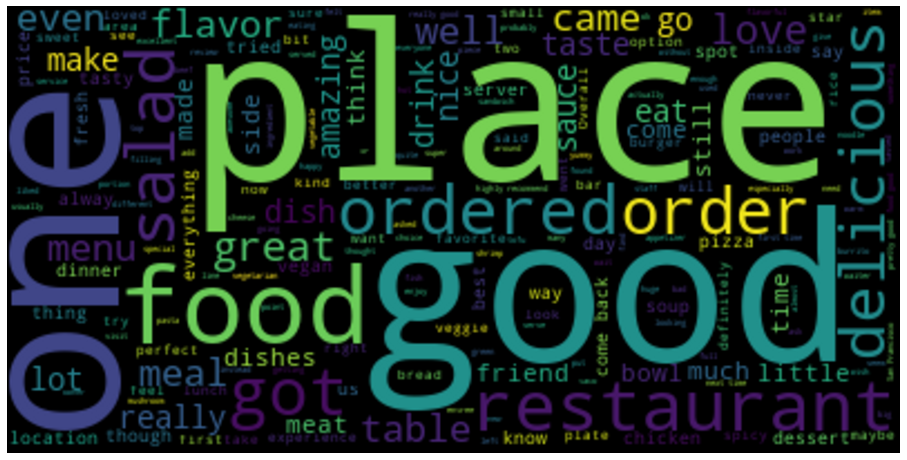

In [157]:
user_text = str(user_text)

wordcloud = WordCloud().generate(user_text)
plt.figure(figsize=(16,16))
plt.imshow(wordcloud, interpolation="mitchell")
plt.axis("off") #Don't show axis since not needed
plt.show()

In [158]:
def clean_data(average_ratings, number_of_reviews, price_per_person):
    for rating in average_ratings:
        try:
            average_ratings[rating] = float(average_ratings[rating].replace(" star rating", ""))
        except:
            print("")
    for i in number_of_reviews:
        try:
            temp = number_of_reviews[i].replace(" review", "")
            temp = number_of_reviews[i].replace(" reviews", "")
            number_of_reviews[i] = int(temp)
        except:
            print("")
    for i in price_per_person:
        try:
            price_per_person[i] = len(price_per_person[i])-1
        except:
            print("")
        
clean_data(veg_average_ratings, veg_number_of_reviews, veg_price_per_person)
clean_data(non_veg_average_ratings, non_veg_number_of_reviews, non_veg_price_per_person)

In [159]:
non_veg_user_ratings

{'https://www.yelp.com/biz/tselogs-san-francisco-5?osq=Restaurants': ['5 star rating',
  '2 star rating',
  '4 star rating',
  '3 star rating',
  '5 star rating',
  '4 star rating',
  '4 star rating',
  '5 star rating',
  '4 star rating',
  '4 star rating',
  '5 star rating',
  '5 star rating',
  '4 star rating',
  '5 star rating',
  '4 star rating',
  '3 star rating',
  '5 star rating',
  '1 star rating',
  '2 star rating',
  '4 star rating'],
 'https://www.yelp.com/biz/nicks-crispy-tacos-san-francisco-2?osq=Restaurants': ['4 star rating',
  '3 star rating',
  '3 star rating',
  '2 star rating',
  '3 star rating',
  '4 star rating',
  '2 star rating',
  '5 star rating',
  '5 star rating',
  '4 star rating',
  '4 star rating',
  '1 star rating',
  '2 star rating',
  '5 star rating',
  '3 star rating',
  '3 star rating',
  '3 star rating',
  '3 star rating',
  '4 star rating',
  '4 star rating'],
 'https://www.yelp.com/biz/golden-boy-pizza-san-francisco?osq=Restaurants': ['5 star rating

In [160]:
veg_user_ratings

{'https://www.yelp.com/biz/the-dosa-brothers-san-francisco-10?osq=Restaurants': ['5 star rating',
  '5 star rating',
  '4 star rating',
  '3 star rating',
  '5 star rating',
  '4 star rating',
  '3 star rating',
  '5 star rating',
  '4 star rating',
  '5 star rating',
  '5 star rating',
  '5 star rating',
  '1 star rating',
  '5 star rating',
  '5 star rating'],
 'https://www.yelp.com/biz/lucky-creation-vegetarian-restaurant-san-francisco?osq=Restaurants': ['5 star rating',
  '5 star rating',
  '5 star rating',
  '3 star rating',
  '4 star rating',
  '4 star rating',
  '5 star rating',
  '5 star rating',
  '4 star rating',
  '4 star rating',
  '3 star rating',
  '5 star rating',
  '1 star rating',
  '5 star rating',
  '4 star rating',
  '5 star rating',
  '3 star rating',
  '5 star rating',
  '4 star rating',
  '5 star rating'],
 'https://www.yelp.com/biz/peasant-pies-noe-valley-san-francisco?osq=Restaurants': ['4 star rating',
  '4 star rating',
  '4 star rating',
  '4 star rating',
 

In [85]:
#non_veg_user_ratings.replace(' star rating', "")

In [161]:
non_veg_user_ratings_list = list(non_veg_user_ratings.values())
for i in range(len(non_veg_user_ratings_list)):
    for j in range(len(non_veg_user_ratings_list[i])):
        try:
            non_veg_user_ratings_list[i][j] = int(non_veg_user_ratings_list[i][j].replace(" star rating", ""))
        except:
            print()

In [162]:
veg_user_ratings_list = list(veg_user_ratings.values())
for i in range(len(veg_user_ratings_list)):
    for j in range(len(veg_user_ratings_list[i])):
        veg_user_ratings_list[i][j] = int(veg_user_ratings_list[i][j].replace(" star rating", ""))

In [163]:
non_veg_user_ratings_list

[[5, 2, 4, 3, 5, 4, 4, 5, 4, 4, 5, 5, 4, 5, 4, 3, 5, 1, 2, 4],
 [4, 3, 3, 2, 3, 4, 2, 5, 5, 4, 4, 1, 2, 5, 3, 3, 3, 3, 4, 4],
 [5, 4, 5, 4, 5, 4, 5, 5, 5, 4, 5, 4, 4, 4, 5, 4, 5, 3, 5, 3],
 [5, 4, 5, 5, 5, 4, 5, 5, 4, 5, 4, 4, 3, 5, 5, 3, 4, 4, 4, 4],
 [5, 4, 4, 2, 3, 5, 4, 2, 5, 4, 5, 5, 4, 4, 5, 5, 4, 4, 3, 5],
 [5, 4, 5, 5, 5, 4, 4, 4, 4, 5, 2, 5, 3, 4, 4, 4, 5, 4, 4, 3],
 [5, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 3, 4, 3, 5, 4, 4, 3, 5, 5],
 [5, 4, 4, 5, 5, 5, 5, 3, 3, 5, 4, 2, 2, 5, 5, 4, 3, 5, 5, 5],
 [4, 5, 2, 4, 3, 5, 3, 5, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4],
 [5, 4, 4, 3, 5, 5, 1, 4, 4, 4, 5, 5, 5, 3, 5, 4, 1, 5, 5, 4],
 [5, 3, 3, 4, 3, 3, 3, 4, 5, 4, 5, 5, 3, 5, 5, 4, 4, 1, 3, 5],
 [5, 2, 4, 3, 4, 3, 5, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3, 4],
 [5, 4, 5, 4, 3, 4, 5, 4, 4, 5, 4, 5, 3, 3, 3, 5, 4, 4, 3, 4],
 [4, 3, 3, 4, 3, 5, 3, 5, 5, 3, 4, 3, 5, 4, 5, 3, 4, 4, 2, 5],
 [5, 4, 3, 5, 5, 4, 4, 4, 1, 5, 3, 5, 3, 4, 4, 5, 5, 3, 3, 5],
 [5, 2, 4, 4, 5, 5, 4, 4, 2, 4, 2, 5, 4, 4, 4, 5, 3, 4,

In [164]:
veg_user_ratings_list

[[5, 5, 4, 3, 5, 4, 3, 5, 4, 5, 5, 5, 1, 5, 5],
 [5, 5, 5, 3, 4, 4, 5, 5, 4, 4, 3, 5, 1, 5, 4, 5, 3, 5, 4, 5],
 [4, 4, 4, 4, 4, 5, 3, 5, 5, 5, 4, 4, 5, 4, 5, 1, 4, 5, 4, 5],
 [5, 5, 5, 4, 5, 5, 5, 5, 2, 5, 3, 5, 5, 5, 5, 5, 5, 3, 2, 1],
 [5, 4, 2, 5, 3, 2, 5, 5, 4, 1, 4, 4, 3, 4, 4, 5, 4, 3, 3, 4],
 [4, 4, 3, 4, 5, 5, 3, 4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 3],
 [5, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 5, 5, 4, 3, 3, 4, 5, 4, 4],
 [5, 5, 5],
 [5, 3, 3, 3, 3, 5, 5, 4, 4, 2, 3, 4, 1, 4, 4, 5, 4, 2, 4, 3],
 [5, 5, 5, 1, 4, 5, 2, 3, 3],
 [4, 1, 2, 1, 3, 4, 2, 4, 3, 5, 2, 1, 1, 5, 1, 4, 3, 5, 3, 1],
 [5, 3, 5, 4, 5, 5, 5, 1, 2, 3, 5, 2, 5, 4, 5, 4, 2, 3, 5, 4],
 [5, 3, 5, 4, 5, 5, 4, 3, 5, 5, 4, 4, 5, 5, 3, 1, 5, 5, 5, 4],
 [4, 1, 5, 3, 2, 4, 3, 1, 4, 5, 4, 5, 4, 3, 3, 3, 5, 1, 4, 4],
 [5, 3, 5, 4, 4, 3, 4, 1, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 4, 5],
 [4, 5, 4, 4, 4, 5, 5, 4, 2, 4, 4, 2, 3, 4, 4, 4, 5, 4, 5, 2],
 [5, 3, 4, 4, 5, 3, 3, 1, 3, 2, 3, 4, 3, 3, 3, 3, 4, 3, 4, 5],
 [4, 4, 4, 5, 2, 3, 5, 5, 2,

In [165]:
non_veg_average = []
for i in range(len(non_veg_user_ratings_list)):
    non_veg_average.append(np.nanmean(non_veg_user_ratings_list[i]))
    
non_veg_average

[3.9,
 3.35,
 4.4,
 4.35,
 4.1,
 4.15,
 4.4,
 4.2,
 4.1,
 4.05,
 3.85,
 4.2,
 4.05,
 3.85,
 4.0,
 3.95,
 3.8,
 4.15,
 3.85,
 4.3,
 4.45,
 4.55,
 4.2,
 4.0,
 4.1,
 4.65,
 3.45,
 4.4,
 4.1,
 3.7,
 3.8,
 4.45,
 3.8,
 4.5,
 3.3,
 4.5,
 4.75,
 3.7,
 4.5,
 4.4,
 4.2,
 4.6,
 4.25,
 4.15,
 4.55,
 4.05,
 4.3,
 3.7,
 3.7,
 3.25,
 3.85,
 4.15,
 4.142857142857143,
 3.8,
 4.35,
 3.65,
 4.4,
 3.7,
 4.5,
 3.4,
 3.9,
 4.55,
 3.9,
 3.9,
 4.4,
 4.05,
 4.1,
 4.3,
 4.1,
 3.0,
 3.8,
 4.3,
 4.0,
 4.45,
 3.55,
 4.2,
 4.0,
 3.6,
 4.9,
 3.75,
 4.15,
 3.6,
 4.25,
 4.15,
 3.8,
 3.15,
 4.4,
 2.8,
 4.1,
 4.55,
 4.4,
 4.35,
 3.7,
 4.2,
 4.25,
 3.7,
 4.35,
 4.65,
 4.2,
 4.85,
 3.95,
 4.6,
 4.0,
 4.05,
 4.55,
 4.05,
 4.25,
 4.1,
 4.15,
 4.65,
 3.75,
 4.4,
 4.0,
 3.85,
 4.0,
 4.25,
 4.35,
 4.05,
 3.65,
 4.6,
 3.85,
 4.55,
 4.1,
 3.5,
 3.85,
 3.6,
 3.6,
 4.35,
 3.65,
 4.7,
 4.4,
 4.1,
 4.25,
 3.95,
 3.9,
 3.9,
 4.5,
 4.05,
 4.15,
 4.0,
 4.1,
 3.4,
 4.2,
 4.05,
 4.3,
 4.35,
 3.9,
 3.75,
 4.55,
 4.15,
 4.15,
 4.3,
 4.15,

In [166]:
veg_average = []
for i in range(len(veg_user_ratings_list)):
    veg_average.append(np.nanmean(veg_user_ratings_list[i]))
    
veg_average

[4.266666666666667,
 4.2,
 4.2,
 4.25,
 3.7,
 4.4,
 3.9,
 5.0,
 3.55,
 3.6666666666666665,
 2.75,
 3.85,
 4.25,
 3.4,
 4.1,
 3.9,
 3.4,
 3.85,
 4.2,
 3.7,
 3.8,
 4.15,
 3.25,
 4.0,
 4.15,
 4.15,
 4.25,
 4.0,
 3.45,
 3.1,
 3.05,
 4.2,
 3.45,
 3.6,
 2.85,
 3.85,
 3.45,
 3.1,
 4.0,
 4.45,
 4.05,
 4.1,
 4.45,
 4.15,
 3.3,
 4.35,
 3.4,
 3.65,
 4.3,
 4.25,
 3.75,
 3.9,
 4.0,
 4.15,
 4.25,
 3.8,
 3.5,
 3.7,
 3.95,
 4.0,
 3.05,
 3.85,
 3.95,
 2.25,
 3.7,
 3.45,
 3.9,
 3.15,
 4.05,
 2.6,
 4.0,
 3.5,
 4.25,
 4.5,
 3.2,
 3.65,
 3.95,
 2.9,
 3.45,
 4.0,
 4.5,
 4.7,
 3.95,
 4.85,
 4.65,
 4.35,
 4.4,
 4.05,
 3.75,
 4.1,
 4.1,
 3.85,
 4.0,
 4.35,
 4.2,
 3.8,
 3.35,
 2.2,
 4.5,
 3.8,
 4.05,
 4.4,
 3.9,
 4.85,
 3.8,
 4.65,
 3.95,
 4.15,
 4.25,
 4.65,
 4.15,
 4.55,
 3.65,
 4.6,
 3.75,
 4.55,
 3.55,
 4.45,
 4.4,
 3.75,
 3.8,
 3.3,
 4.65,
 3.85,
 3.45,
 4.2,
 4.15,
 3.75,
 4.5,
 4.85,
 4.7,
 4.3,
 5.0,
 4.75,
 3.75,
 3.6,
 3.35,
 4.65,
 4.7,
 3.45,
 3.95,
 3.55,
 4.15,
 3.55,
 4.35,
 3.4,
 4.25,
 3.9,
 4.

In [105]:
len(non_veg_user_ratings)
len(non_veg_average)

177

In [168]:
for i in range(len(non_veg_user_ratings)):
    non_veg_user_ratings_list[i].append(non_veg_average[i])

non_veg_user_ratings_list


[[5, 2, 4, 3, 5, 4, 4, 5, 4, 4, 5, 5, 4, 5, 4, 3, 5, 1, 2, 4, 3.9],
 [4, 3, 3, 2, 3, 4, 2, 5, 5, 4, 4, 1, 2, 5, 3, 3, 3, 3, 4, 4, 3.35],
 [5, 4, 5, 4, 5, 4, 5, 5, 5, 4, 5, 4, 4, 4, 5, 4, 5, 3, 5, 3, 4.4],
 [5, 4, 5, 5, 5, 4, 5, 5, 4, 5, 4, 4, 3, 5, 5, 3, 4, 4, 4, 4, 4.35],
 [5, 4, 4, 2, 3, 5, 4, 2, 5, 4, 5, 5, 4, 4, 5, 5, 4, 4, 3, 5, 4.1],
 [5, 4, 5, 5, 5, 4, 4, 4, 4, 5, 2, 5, 3, 4, 4, 4, 5, 4, 4, 3, 4.15],
 [5, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 3, 4, 3, 5, 4, 4, 3, 5, 5, 4.4],
 [5, 4, 4, 5, 5, 5, 5, 3, 3, 5, 4, 2, 2, 5, 5, 4, 3, 5, 5, 5, 4.2],
 [4, 5, 2, 4, 3, 5, 3, 5, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4.1],
 [5, 4, 4, 3, 5, 5, 1, 4, 4, 4, 5, 5, 5, 3, 5, 4, 1, 5, 5, 4, 4.05],
 [5, 3, 3, 4, 3, 3, 3, 4, 5, 4, 5, 5, 3, 5, 5, 4, 4, 1, 3, 5, 3.85],
 [5, 2, 4, 3, 4, 3, 5, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3, 4, 4.2],
 [5, 4, 5, 4, 3, 4, 5, 4, 4, 5, 4, 5, 3, 3, 3, 5, 4, 4, 3, 4, 4.05],
 [4, 3, 3, 4, 3, 5, 3, 5, 5, 3, 4, 3, 5, 4, 5, 3, 4, 4, 2, 5, 3.85],
 [5, 4, 3, 5, 5, 4, 4, 4, 1, 5, 3, 5, 3, 

In [176]:
for i in range(len(veg_user_ratings)):
    veg_user_ratings_list[i].append(veg_average[i])

veg_user_ratings_list

[[5,
  5,
  4,
  3,
  5,
  4,
  3,
  5,
  4,
  5,
  5,
  5,
  1,
  5,
  5,
  4.266666666666667,
  4.266666666666667],
 [5, 5, 5, 3, 4, 4, 5, 5, 4, 4, 3, 5, 1, 5, 4, 5, 3, 5, 4, 5, 4.2],
 [4, 4, 4, 4, 4, 5, 3, 5, 5, 5, 4, 4, 5, 4, 5, 1, 4, 5, 4, 5, 4.2],
 [5, 5, 5, 4, 5, 5, 5, 5, 2, 5, 3, 5, 5, 5, 5, 5, 5, 3, 2, 1, 4.25],
 [5, 4, 2, 5, 3, 2, 5, 5, 4, 1, 4, 4, 3, 4, 4, 5, 4, 3, 3, 4, 3.7],
 [4, 4, 3, 4, 5, 5, 3, 4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 3, 4.4],
 [5, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 5, 5, 4, 3, 3, 4, 5, 4, 4, 3.9],
 [5, 5, 5, 5.0, 5.0],
 [5, 3, 3, 3, 3, 5, 5, 4, 4, 2, 3, 4, 1, 4, 4, 5, 4, 2, 4, 3, 3.55],
 [5, 5, 5, 1, 4, 5, 2, 3, 3, 3.6666666666666665, 3.6666666666666665],
 [4, 1, 2, 1, 3, 4, 2, 4, 3, 5, 2, 1, 1, 5, 1, 4, 3, 5, 3, 1, 2.75],
 [5, 3, 5, 4, 5, 5, 5, 1, 2, 3, 5, 2, 5, 4, 5, 4, 2, 3, 5, 4, 3.85],
 [5, 3, 5, 4, 5, 5, 4, 3, 5, 5, 4, 4, 5, 5, 3, 1, 5, 5, 5, 4, 4.25],
 [4, 1, 5, 3, 2, 4, 3, 1, 4, 5, 4, 5, 4, 3, 3, 3, 5, 1, 4, 4, 3.4],
 [5, 3, 5, 4, 4, 3, 4, 1, 4, 4, 4, 4,

In [167]:
for i in non_veg_user_ratings:
    while(len(i) < 20):
        i.append(None)
        
for i in veg_user_ratings:
    while(len(i) < 20):
        i.append(None)

In [170]:
reviews_df = pd.DataFrame({k: pd.Series(l) for k, l in non_veg_user_ratings.items()}) #Dataframe with review ratings
reviews_df.index = ["Review_1", "Review_2","Review_3","Review_4","Review_5","Review_6","Review_7","Review_8","Review_9","Review_10","Review_11","Review_12","Review_13","Review_14","Review_15","Review_16","Review_17","Review_18","Review_19","Review_20","Review_Average"]
reviews_df

,https://www.yelp.com/biz/tselogs-san-francisco-5?osq=Restaurants,https://www.yelp.com/biz/nicks-crispy-tacos-san-francisco-2?osq=Restaurants,https://www.yelp.com/biz/golden-boy-pizza-san-francisco?osq=Restaurants,https://www.yelp.com/biz/house-of-pancakes-san-francisco?osq=Restaurants,https://www.yelp.com/biz/the-bird-san-francisco?osq=Restaurants,https://www.yelp.com/biz/el-farolito-san-francisco-2?osq=Restaurants,https://www.yelp.com/biz/la-taqueria-san-francisco-2?osq=Restaurants,https://www.yelp.com/biz/thai-time-restaurant-san-francisco?osq=Restaurants,https://www.yelp.com/biz/super-duper-burgers-san-francisco-4?osq=Restaurants,https://www.yelp.com/biz/palmyra-san-francisco?osq=Restaurants,...,https://www.yelp.com/biz/gibson-san-francisco?osq=Restaurants,https://www.yelp.com/biz/cala-san-francisco-2?osq=Restaurants,https://www.yelp.com/biz/cafe-claude-san-francisco?osq=Restaurants,https://www.yelp.com/biz/absinthe-brasserie-and-bar-san-francisco-2?osq=Restaurants,https://www.yelp.com/biz/maybecks-san-francisco?osq=Restaurants,https://www.yelp.com/biz/central-kitchen-san-francisco?osq=Restaurants,https://www.yelp.com/biz/johns-grill-san-francisco?osq=Restaurants,https://www.yelp.com/biz/altovino-san-francisco?osq=Restaurants,https://www.yelp.com/biz/sasa-san-francisco?osq=Restaurants,https://www.yelp.com/biz/crustacean-san-francisco?osq=Restaurants
Review_1,5.0,4.00,5.0,5.00,5.0,5.00,5.0,5.0,4.0,5.00,...,5.00,4.0,5.0,4.00,5.0,4.00,5.00,5.00,5.0,5.0
Review_2,2.0,3.00,4.0,4.00,4.0,4.00,4.0,4.0,5.0,4.00,...,5.00,3.0,5.0,5.00,4.0,2.00,2.00,5.00,4.0,5.0
Review_3,4.0,3.00,5.0,5.00,4.0,5.00,5.0,4.0,2.0,4.00,...,4.00,5.0,5.0,4.00,5.0,4.00,5.00,4.00,4.0,5.0
Review_4,3.0,2.00,4.0,5.00,2.0,5.00,5.0,5.0,4.0,3.00,...,5.00,3.0,4.0,3.00,5.0,3.00,5.00,4.00,4.0,4.0
Review_5,5.0,3.00,5.0,5.00,3.0,5.00,4.0,5.0,3.0,5.00,...,1.00,4.0,3.0,5.00,5.0,4.00,3.00,5.00,5.0,5.0
Review_6,4.0,4.00,4.0,4.00,5.0,4.00,4.0,5.0,5.0,5.00,...,4.00,3.0,4.0,5.00,5.0,5.00,4.00,5.00,5.0,5.0
Review_7,4.0,2.00,5.0,5.00,4.0,4.00,5.0,5.0,3.0,1.00,...,3.00,5.0,3.0,5.00,4.0,5.00,4.00,5.00,5.0,5.0
Review_8,5.0,5.00,5.0,5.00,2.0,4.00,5.0,3.0,5.0,4.00,...,5.00,5.0,5.0,4.00,5.0,4.00,5.00,5.00,4.0,5.0
Review_9,4.0,5.00,5.0,4.00,5.0,4.00,5.0,3.0,5.0,4.00,...,4.00,4.0,4.0,3.00,4.0,3.00,5.00,3.00,4.0,5.0
Review_10,4.0,4.00,4.0,5.00,4.0,5.00,5.0,5.0,4.0,4.00,...,4.00,4.0,4.0,5.00,5.0,4.00,5.00,5.00,4.0,2.0


In [171]:
veg_user_ratings

{'https://www.yelp.com/biz/the-dosa-brothers-san-francisco-10?osq=Restaurants': [5,
  5,
  4,
  3,
  5,
  4,
  3,
  5,
  4,
  5,
  5,
  5,
  1,
  5,
  5,
  4.266666666666667],
 'https://www.yelp.com/biz/lucky-creation-vegetarian-restaurant-san-francisco?osq=Restaurants': [5,
  5,
  5,
  3,
  4,
  4,
  5,
  5,
  4,
  4,
  3,
  5,
  1,
  5,
  4,
  5,
  3,
  5,
  4,
  5,
  4.2],
 'https://www.yelp.com/biz/peasant-pies-noe-valley-san-francisco?osq=Restaurants': [4,
  4,
  4,
  4,
  4,
  5,
  3,
  5,
  5,
  5,
  4,
  4,
  5,
  4,
  5,
  1,
  4,
  5,
  4,
  5,
  4.2],
 'https://www.yelp.com/biz/halal-shop-san-francisco-2?osq=Restaurants': [5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  2,
  5,
  3,
  5,
  5,
  5,
  5,
  5,
  5,
  3,
  2,
  1,
  4.25],
 'https://www.yelp.com/biz/mortys-delicatessen-san-francisco?osq=Restaurants': [5,
  4,
  2,
  5,
  3,
  2,
  5,
  5,
  4,
  1,
  4,
  4,
  3,
  4,
  4,
  5,
  4,
  3,
  3,
  4,
  3.7],
 'https://www.yelp.com/biz/peasant-pies-caf%C3%A9-and-catering-sa

In [172]:
len(veg_user_ratings)

504

In [175]:
veg_user_ratings

{'https://www.yelp.com/biz/the-dosa-brothers-san-francisco-10?osq=Restaurants': [5,
  5,
  4,
  3,
  5,
  4,
  3,
  5,
  4,
  5,
  5,
  5,
  1,
  5,
  5,
  4.266666666666667],
 'https://www.yelp.com/biz/lucky-creation-vegetarian-restaurant-san-francisco?osq=Restaurants': [5,
  5,
  5,
  3,
  4,
  4,
  5,
  5,
  4,
  4,
  3,
  5,
  1,
  5,
  4,
  5,
  3,
  5,
  4,
  5],
 'https://www.yelp.com/biz/peasant-pies-noe-valley-san-francisco?osq=Restaurants': [4,
  4,
  4,
  4,
  4,
  5,
  3,
  5,
  5,
  5,
  4,
  4,
  5,
  4,
  5,
  1,
  4,
  5,
  4,
  5],
 'https://www.yelp.com/biz/halal-shop-san-francisco-2?osq=Restaurants': [5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  2,
  5,
  3,
  5,
  5,
  5,
  5,
  5,
  5,
  3,
  2,
  1],
 'https://www.yelp.com/biz/mortys-delicatessen-san-francisco?osq=Restaurants': [5,
  4,
  2,
  5,
  3,
  2,
  5,
  5,
  4,
  1,
  4,
  4,
  3,
  4,
  4,
  5,
  4,
  3,
  3,
  4],
 'https://www.yelp.com/biz/peasant-pies-caf%C3%A9-and-catering-san-francisco-5?osq=Restaurants

In [173]:
for i in veg_user_ratings:
    try:
        veg_user_ratings[i].pop(20)
    except:
        print()

In [177]:
veg_reviews_df = pd.DataFrame({k: pd.Series(l) for k, l in veg_user_ratings.items()}) #Dataframe with review ratings
veg_reviews_df.index = ["Review_1", "Review_2","Review_3","Review_4","Review_5","Review_6","Review_7","Review_8","Review_9","Review_10","Review_11","Review_12","Review_13","Review_14","Review_15","Review_16","Review_17","Review_18","Review_19","Review_20","Review_Average"]
veg_reviews_df

,https://www.yelp.com/biz/the-dosa-brothers-san-francisco-10?osq=Restaurants,https://www.yelp.com/biz/lucky-creation-vegetarian-restaurant-san-francisco?osq=Restaurants,https://www.yelp.com/biz/peasant-pies-noe-valley-san-francisco?osq=Restaurants,https://www.yelp.com/biz/halal-shop-san-francisco-2?osq=Restaurants,https://www.yelp.com/biz/mortys-delicatessen-san-francisco?osq=Restaurants,https://www.yelp.com/biz/peasant-pies-caf%C3%A9-and-catering-san-francisco-5?osq=Restaurants,https://www.yelp.com/biz/peasant-pies-caf%C3%A9-and-catering-san-francisco-2?osq=Restaurants,https://www.yelp.com/biz/something-simple-for-lunch-san-francisco?osq=Restaurants,https://www.yelp.com/biz/cafe-insalata-san-francisco?osq=Restaurants,https://www.yelp.com/biz/the-dosa-brothers-san-francisco-12?osq=Restaurants,...,https://www.yelp.com/biz/kaliflower-chicago-4?osq=Restaurants,https://www.yelp.com/biz/den-den-restaurant-chicago?osq=Restaurants,https://www.yelp.com/biz/sweetgreen-chicago-3?osq=Restaurants,https://www.yelp.com/biz/amitabul-chicago-5?osq=Restaurants,https://www.yelp.com/biz/kopi-a-travelers-cafe-chicago?osq=Restaurants,https://www.yelp.com/biz/phos-spicier-thai-cuisine-chicago?osq=Restaurants,https://www.yelp.com/biz/udupi-palace-restaurant-chicago?osq=Restaurants,https://www.yelp.com/biz/idof-fresh-mediterranean-chicago-8?osq=Restaurants,https://www.yelp.com/biz/arya-bhavan-chicago?osq=Restaurants,https://www.yelp.com/biz/munch-oak-park-2?osq=Restaurants
Review_1,5.000000,5.0,4.0,5.00,5.0,4.0,5.0,5.0,5.00,5.000000,...,5.00,5.00,5.00,5.0,4.0,5.00,5.0,5.0,5.00,5.0
Review_2,5.000000,5.0,4.0,5.00,4.0,4.0,3.0,5.0,3.00,5.000000,...,4.00,3.00,4.00,3.0,5.0,5.00,3.0,5.0,5.00,3.0
Review_3,4.000000,5.0,4.0,5.00,2.0,3.0,4.0,5.0,3.00,5.000000,...,5.00,5.00,4.00,5.0,4.0,3.00,1.0,1.0,4.00,4.0
Review_4,3.000000,3.0,4.0,4.00,5.0,4.0,3.0,5.0,3.00,1.000000,...,5.00,4.00,5.00,5.0,4.0,1.00,3.0,5.0,5.00,5.0
Review_5,5.000000,4.0,4.0,5.00,3.0,5.0,4.0,5.0,3.00,4.000000,...,5.00,5.00,5.00,3.0,4.0,5.00,3.0,2.0,1.00,5.0
Review_6,4.000000,4.0,5.0,5.00,2.0,5.0,4.0,NaN,5.00,5.000000,...,5.00,5.00,5.00,5.0,5.0,5.00,5.0,5.0,4.00,5.0
Review_7,3.000000,5.0,3.0,5.00,5.0,3.0,4.0,NaN,5.00,2.000000,...,3.00,5.00,4.00,5.0,5.0,5.00,3.0,5.0,5.00,1.0
Review_8,5.000000,5.0,5.0,5.00,5.0,4.0,4.0,NaN,4.00,3.000000,...,5.00,5.00,4.00,5.0,2.0,5.00,5.0,5.0,1.00,5.0
Review_9,4.000000,4.0,5.0,2.00,4.0,5.0,4.0,NaN,4.00,3.000000,...,4.00,5.00,5.00,4.0,3.0,4.00,1.0,1.0,5.00,5.0
Review_10,5.000000,4.0,5.0,5.00,1.0,4.0,3.0,NaN,2.00,3.666667,...,5.00,4.00,4.00,5.0,5.0,1.00,1.0,4.0,1.00,4.0


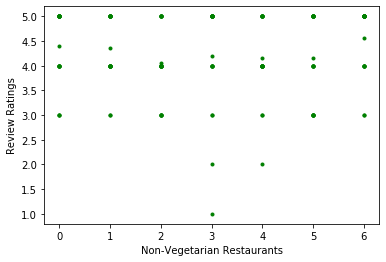

In [55]:
fig = plt.figure()
x1 = fig.add_subplot(1, 1, 1)
x1.set_xlabel('Non-Vegetarian Restaurants')
x1.set_ylabel('Review Ratings')
x1.plot(non_veg_user_ratings_list,'g.')

In [178]:
import pandas as pd

def get_df(average_ratings, number_of_reviews, price_per_person,average):
    data = {
        "Restaurants": list(average_ratings.keys()),
        "Average Ratings": list(average_ratings.values()),
        "Number Of Reviews": list(number_of_reviews.values()),
        "Price Per Person": list(price_per_person.values()),
        "Review Average": list(average),
    }
    return pd.DataFrame(data, columns=['Restaurants', 'Average Ratings', 'Number Of Reviews', 'Price Per Person', 'Review Average'])

veg_df = get_df(veg_average_ratings, veg_number_of_reviews, veg_price_per_person, veg_average)
non_veg_df = get_df(non_veg_average_ratings, non_veg_number_of_reviews, non_veg_price_per_person, non_veg_average)


In [179]:
non_veg_df

,Restaurants,Average Ratings,Number Of Reviews,Price Per Person,Review Average
0,https://www.yelp.com/biz/tselogs-san-francisco...,4.5,601,1,3.90
1,https://www.yelp.com/biz/nicks-crispy-tacos-sa...,4.0,3312,1,3.35
2,https://www.yelp.com/biz/golden-boy-pizza-san-...,4.5,3448,1,4.40
3,https://www.yelp.com/biz/house-of-pancakes-san...,4.0,951,1,4.35
4,https://www.yelp.com/biz/the-bird-san-francisc...,4.0,1661,1,4.10
...,...,...,...,...,...
292,https://www.yelp.com/biz/central-kitchen-san-f...,3.5,580,3,3.85
293,https://www.yelp.com/biz/johns-grill-san-franc...,3.5,1272,3,3.95
294,https://www.yelp.com/biz/altovino-san-francisc...,4.5,75,3,4.55
295,https://www.yelp.com/biz/sasa-san-francisco?os...,4.0,184,3,4.50


In [180]:
veg_df

,Restaurants,Average Ratings,Number Of Reviews,Price Per Person,Review Average
0,https://www.yelp.com/biz/the-dosa-brothers-san...,4.5,15,1,4.266667
1,https://www.yelp.com/biz/lucky-creation-vegeta...,4.0,531,1,4.200000
2,https://www.yelp.com/biz/peasant-pies-noe-vall...,4.0,284,1,4.200000
3,https://www.yelp.com/biz/halal-shop-san-franci...,4.5,65,1,4.250000
4,https://www.yelp.com/biz/mortys-delicatessen-s...,4.0,519,1,3.700000
...,...,...,...,...,...
499,https://www.yelp.com/biz/phos-spicier-thai-cui...,4.0,72,2,3.350000
500,https://www.yelp.com/biz/udupi-palace-restaura...,3.5,362,2,3.000000
501,https://www.yelp.com/biz/idof-fresh-mediterran...,4.0,44,2,3.800000
502,https://www.yelp.com/biz/arya-bhavan-chicago?o...,3.5,229,2,3.550000


In [181]:
price1_per_review_average = []  #review average for $
price2_per_review_average = []  #review average for $$
price3_per_review_average = []  #review average for $$$
price4_per_review_average = []  #review average for $$$$

for i in range(len(non_veg_df)):
    if (non_veg_df['Price Per Person'][i] == 1):
        price1_per_review_average.append(non_veg_df['Review Average'][i])
    elif (non_veg_df['Price Per Person'][i] == 2):
        price2_per_review_average.append(non_veg_df['Review Average'][i])
    elif (non_veg_df['Price Per Person'][i] == 3):
        price3_per_review_average.append(non_veg_df['Review Average'][i])
    else:
        price4_per_review_average.append(non_veg_df['Review Average'][i])

veg_price1_per_review_average = []  #review average for $
veg_price2_per_review_average = []  #review average for $$
veg_price3_per_review_average = []  #review average for $$$
veg_price4_per_review_average = []  #review average for $$$$

for i in range(len(veg_df)):
    if (veg_df['Price Per Person'][i] == 1):
        veg_price1_per_review_average.append(veg_df['Review Average'][i])
    elif (veg_df['Price Per Person'][i] == 2):
        veg_price2_per_review_average.append(veg_df['Review Average'][i])
    elif (veg_df['Price Per Person'][i] == 3):
        veg_price3_per_review_average.append(veg_df['Review Average'][i])
    else:
        veg_price4_per_review_average.append(veg_df['Review Average'][i])

In [182]:
veg_reviews_df

,https://www.yelp.com/biz/the-dosa-brothers-san-francisco-10?osq=Restaurants,https://www.yelp.com/biz/lucky-creation-vegetarian-restaurant-san-francisco?osq=Restaurants,https://www.yelp.com/biz/peasant-pies-noe-valley-san-francisco?osq=Restaurants,https://www.yelp.com/biz/halal-shop-san-francisco-2?osq=Restaurants,https://www.yelp.com/biz/mortys-delicatessen-san-francisco?osq=Restaurants,https://www.yelp.com/biz/peasant-pies-caf%C3%A9-and-catering-san-francisco-5?osq=Restaurants,https://www.yelp.com/biz/peasant-pies-caf%C3%A9-and-catering-san-francisco-2?osq=Restaurants,https://www.yelp.com/biz/something-simple-for-lunch-san-francisco?osq=Restaurants,https://www.yelp.com/biz/cafe-insalata-san-francisco?osq=Restaurants,https://www.yelp.com/biz/the-dosa-brothers-san-francisco-12?osq=Restaurants,...,https://www.yelp.com/biz/kaliflower-chicago-4?osq=Restaurants,https://www.yelp.com/biz/den-den-restaurant-chicago?osq=Restaurants,https://www.yelp.com/biz/sweetgreen-chicago-3?osq=Restaurants,https://www.yelp.com/biz/amitabul-chicago-5?osq=Restaurants,https://www.yelp.com/biz/kopi-a-travelers-cafe-chicago?osq=Restaurants,https://www.yelp.com/biz/phos-spicier-thai-cuisine-chicago?osq=Restaurants,https://www.yelp.com/biz/udupi-palace-restaurant-chicago?osq=Restaurants,https://www.yelp.com/biz/idof-fresh-mediterranean-chicago-8?osq=Restaurants,https://www.yelp.com/biz/arya-bhavan-chicago?osq=Restaurants,https://www.yelp.com/biz/munch-oak-park-2?osq=Restaurants
Review_1,5.000000,5.0,4.0,5.00,5.0,4.0,5.0,5.0,5.00,5.000000,...,5.00,5.00,5.00,5.0,4.0,5.00,5.0,5.0,5.00,5.0
Review_2,5.000000,5.0,4.0,5.00,4.0,4.0,3.0,5.0,3.00,5.000000,...,4.00,3.00,4.00,3.0,5.0,5.00,3.0,5.0,5.00,3.0
Review_3,4.000000,5.0,4.0,5.00,2.0,3.0,4.0,5.0,3.00,5.000000,...,5.00,5.00,4.00,5.0,4.0,3.00,1.0,1.0,4.00,4.0
Review_4,3.000000,3.0,4.0,4.00,5.0,4.0,3.0,5.0,3.00,1.000000,...,5.00,4.00,5.00,5.0,4.0,1.00,3.0,5.0,5.00,5.0
Review_5,5.000000,4.0,4.0,5.00,3.0,5.0,4.0,5.0,3.00,4.000000,...,5.00,5.00,5.00,3.0,4.0,5.00,3.0,2.0,1.00,5.0
Review_6,4.000000,4.0,5.0,5.00,2.0,5.0,4.0,NaN,5.00,5.000000,...,5.00,5.00,5.00,5.0,5.0,5.00,5.0,5.0,4.00,5.0
Review_7,3.000000,5.0,3.0,5.00,5.0,3.0,4.0,NaN,5.00,2.000000,...,3.00,5.00,4.00,5.0,5.0,5.00,3.0,5.0,5.00,1.0
Review_8,5.000000,5.0,5.0,5.00,5.0,4.0,4.0,NaN,4.00,3.000000,...,5.00,5.00,4.00,5.0,2.0,5.00,5.0,5.0,1.00,5.0
Review_9,4.000000,4.0,5.0,2.00,4.0,5.0,4.0,NaN,4.00,3.000000,...,4.00,5.00,5.00,4.0,3.0,4.00,1.0,1.0,5.00,5.0
Review_10,5.000000,4.0,5.0,5.00,1.0,4.0,3.0,NaN,2.00,3.666667,...,5.00,4.00,4.00,5.0,5.0,1.00,1.0,4.0,1.00,4.0


In [183]:
reviews_transpose_df = reviews_df.transpose()
reviews_transpose_df = reviews_transpose_df.set_index(pd.Index(range(len(reviews_transpose_df))))

veg_reviews_transpose_df = veg_reviews_df.transpose()
veg_reviews_transpose_df = veg_reviews_transpose_df.set_index(pd.Index(range(len(veg_reviews_transpose_df))))

reviews_transpose_df

,Review_1,Review_2,Review_3,Review_4,Review_5,Review_6,Review_7,Review_8,Review_9,Review_10,...,Review_12,Review_13,Review_14,Review_15,Review_16,Review_17,Review_18,Review_19,Review_20,Review_Average
0,5.0,2.0,4.0,3.0,5.0,4.0,4.0,5.0,4.0,4.0,...,5.0,4.0,5.0,4.0,3.0,5.0,1.0,2.0,4.0,3.90
1,4.0,3.0,3.0,2.0,3.0,4.0,2.0,5.0,5.0,4.0,...,1.0,2.0,5.0,3.0,3.0,3.0,3.0,4.0,4.0,3.35
2,5.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,4.0,4.0,4.0,5.0,4.0,5.0,3.0,5.0,3.0,4.40
3,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,...,4.0,3.0,5.0,5.0,3.0,4.0,4.0,4.0,4.0,4.35
4,5.0,4.0,4.0,2.0,3.0,5.0,4.0,2.0,5.0,4.0,...,5.0,4.0,4.0,5.0,5.0,4.0,4.0,3.0,5.0,4.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,4.0,2.0,4.0,3.0,4.0,5.0,5.0,4.0,3.0,4.0,...,5.0,5.0,5.0,3.0,5.0,5.0,4.0,4.0,1.0,3.85
293,5.0,2.0,5.0,5.0,3.0,4.0,4.0,5.0,5.0,5.0,...,5.0,3.0,5.0,3.0,4.0,3.0,3.0,4.0,4.0,3.95
294,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,...,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,3.0,4.55
295,5.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,...,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,5.0,4.50


In [184]:
veg_reviews_transpose_df

,Review_1,Review_2,Review_3,Review_4,Review_5,Review_6,Review_7,Review_8,Review_9,Review_10,...,Review_12,Review_13,Review_14,Review_15,Review_16,Review_17,Review_18,Review_19,Review_20,Review_Average
0,5.0,5.0,4.0,3.0,5.0,4.0,3.0,5.0,4.0,5.0,...,5.0,1.0,5.0,5.0,4.266667,4.266667,NaN,NaN,NaN,NaN
1,5.0,5.0,5.0,3.0,4.0,4.0,5.0,5.0,4.0,4.0,...,5.0,1.0,5.0,4.0,5.000000,3.000000,5.0,4.0,5.0,4.20
2,4.0,4.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0,...,4.0,5.0,4.0,5.0,1.000000,4.000000,5.0,4.0,5.0,4.20
3,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,2.0,5.0,...,5.0,5.0,5.0,5.0,5.000000,5.000000,3.0,2.0,1.0,4.25
4,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,4.0,1.0,...,4.0,3.0,4.0,4.0,5.000000,4.000000,3.0,3.0,4.0,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,5.0,5.0,3.0,1.0,5.0,5.0,5.0,5.0,4.0,1.0,...,1.0,1.0,2.0,3.0,2.000000,5.000000,5.0,3.0,1.0,3.35
500,5.0,3.0,1.0,3.0,3.0,5.0,3.0,5.0,1.0,1.0,...,1.0,3.0,2.0,4.0,4.000000,1.000000,4.0,2.0,4.0,3.00
501,5.0,5.0,1.0,5.0,2.0,5.0,5.0,5.0,1.0,4.0,...,4.0,4.0,1.0,5.0,5.000000,5.000000,3.0,4.0,2.0,3.80
502,5.0,5.0,4.0,5.0,1.0,4.0,5.0,1.0,5.0,1.0,...,5.0,5.0,1.0,1.0,5.000000,1.000000,5.0,5.0,2.0,3.55


In [185]:
non_veg_result = pd.concat([non_veg_df, reviews_transpose_df], axis=1)
non_veg_result['Yelp Bias'] = non_veg_result['Average Ratings'] - non_veg_result['Review_Average']
veg=[False]*len(non_veg_result)
non_veg_result['Veg']=veg

veg_result = pd.concat([veg_df, veg_reviews_transpose_df], axis=1)
veg_result['Yelp Bias'] = veg_result['Average Ratings'] - veg_result['Review_Average']
veg=[True]*len(veg_result)
veg_result['Veg']=veg
non_veg_result

final_df = pd.concat([non_veg_result, veg_result])
final_df = final_df.set_index(pd.Index(range(len(final_df))))

In [187]:
final = final_df.to_csv(r'polishedfinal_dataframe2.csv')

In [188]:
final_df

,Restaurants,Average Ratings,Number Of Reviews,Price Per Person,Review Average,Review_1,Review_2,Review_3,Review_4,Review_5,...,Review_14,Review_15,Review_16,Review_17,Review_18,Review_19,Review_20,Review_Average,Yelp Bias,Veg
0,https://www.yelp.com/biz/tselogs-san-francisco...,4.5,601,1,3.90,5.0,2.0,4.0,3.0,5.0,...,5.0,4.0,3.0,5.0,1.0,2.0,4.0,3.90,0.60,False
1,https://www.yelp.com/biz/nicks-crispy-tacos-sa...,4.0,3312,1,3.35,4.0,3.0,3.0,2.0,3.0,...,5.0,3.0,3.0,3.0,3.0,4.0,4.0,3.35,0.65,False
2,https://www.yelp.com/biz/golden-boy-pizza-san-...,4.5,3448,1,4.40,5.0,4.0,5.0,4.0,5.0,...,4.0,5.0,4.0,5.0,3.0,5.0,3.0,4.40,0.10,False
3,https://www.yelp.com/biz/house-of-pancakes-san...,4.0,951,1,4.35,5.0,4.0,5.0,5.0,5.0,...,5.0,5.0,3.0,4.0,4.0,4.0,4.0,4.35,-0.35,False
4,https://www.yelp.com/biz/the-bird-san-francisc...,4.0,1661,1,4.10,5.0,4.0,4.0,2.0,3.0,...,4.0,5.0,5.0,4.0,4.0,3.0,5.0,4.10,-0.10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,https://www.yelp.com/biz/phos-spicier-thai-cui...,4.0,72,2,3.35,5.0,5.0,3.0,1.0,5.0,...,2.0,3.0,2.0,5.0,5.0,3.0,1.0,3.35,0.65,True
797,https://www.yelp.com/biz/udupi-palace-restaura...,3.5,362,2,3.00,5.0,3.0,1.0,3.0,3.0,...,2.0,4.0,4.0,1.0,4.0,2.0,4.0,3.00,0.50,True
798,https://www.yelp.com/biz/idof-fresh-mediterran...,4.0,44,2,3.80,5.0,5.0,1.0,5.0,2.0,...,1.0,5.0,5.0,5.0,3.0,4.0,2.0,3.80,0.20,True
799,https://www.yelp.com/biz/arya-bhavan-chicago?o...,3.5,229,2,3.55,5.0,5.0,4.0,5.0,1.0,...,1.0,1.0,5.0,1.0,5.0,5.0,2.0,3.55,-0.05,True


In [132]:
non_veg_result

,Restaurants,Average Ratings,Number Of Reviews,Price Per Person,Review Average,Review_1,Review_2,Review_3,Review_4,Review_5,...,Review_14,Review_15,Review_16,Review_17,Review_18,Review_19,Review_20,Review_Average,Yelp Bias,Veg
0,https://www.yelp.com/biz/tselogs-san-francisco...,4.5,601,1,3.90,5.0,2.0,4.0,3.0,5.0,...,5.0,4.0,3.0,5.0,1.0,2.0,4.0,3.90,0.60,False
1,https://www.yelp.com/biz/nicks-crispy-tacos-sa...,4.0,3312,1,3.35,4.0,3.0,3.0,2.0,3.0,...,5.0,3.0,3.0,3.0,3.0,4.0,4.0,3.35,0.65,False
2,https://www.yelp.com/biz/golden-boy-pizza-san-...,4.5,3448,1,4.40,5.0,4.0,5.0,4.0,5.0,...,4.0,5.0,4.0,5.0,3.0,5.0,3.0,4.40,0.10,False
3,https://www.yelp.com/biz/house-of-pancakes-san...,4.0,951,1,4.35,5.0,4.0,5.0,5.0,5.0,...,5.0,5.0,3.0,4.0,4.0,4.0,4.0,4.35,-0.35,False
4,https://www.yelp.com/biz/the-bird-san-francisc...,4.0,1661,1,4.10,5.0,4.0,4.0,2.0,3.0,...,4.0,5.0,5.0,4.0,4.0,3.0,5.0,4.10,-0.10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,https://www.yelp.com/biz/paina-lounge-and-rest...,4.0,577,2,4.15,4.0,3.0,5.0,4.0,3.0,...,3.0,4.0,4.0,5.0,5.0,3.0,4.0,4.15,-0.15,False
173,https://www.yelp.com/biz/nopalito-san-francisc...,4.0,1313,2,3.75,5.0,2.0,3.0,3.0,4.0,...,5.0,4.0,2.0,3.0,4.0,4.0,5.0,3.75,0.25,False
174,https://www.yelp.com/biz/mangrove-kitchen-san-...,4.0,214,2,3.95,5.0,5.0,4.0,4.0,5.0,...,4.0,5.0,4.0,4.0,4.0,4.0,2.0,3.95,0.05,False
175,https://www.yelp.com/biz/orenchi-beyond-san-fr...,4.0,636,2,3.60,4.0,3.0,2.0,5.0,3.0,...,4.0,4.0,4.0,1.0,4.0,4.0,4.0,3.60,0.40,False


In [133]:
veg_result

,Restaurants,Average Ratings,Number Of Reviews,Price Per Person,Review Average,Review_1,Review_2,Review_3,Review_4,Review_5,...,Review_14,Review_15,Review_16,Review_17,Review_18,Review_19,Review_20,Review_Average,Yelp Bias,Veg
0,https://www.yelp.com/biz/lucky-creation-vegeta...,4.0,531,1,4.266667,5.0,5.0,4.0,3.0,5.0,...,5.0,5.0,4.266667,4.266667,NaN,NaN,NaN,NaN,NaN,True
1,https://www.yelp.com/biz/peasant-pies-noe-vall...,4.0,284,1,4.200000,5.0,5.0,5.0,3.0,4.0,...,5.0,4.0,5.000000,3.000000,5.0,4.0,5.0,4.20,-0.20,True
2,https://www.yelp.com/biz/mortys-delicatessen-s...,4.0,519,1,4.200000,4.0,4.0,4.0,4.0,4.0,...,4.0,5.0,1.000000,4.000000,5.0,4.0,5.0,4.20,-0.20,True
3,https://www.yelp.com/biz/peasant-pies-caf%C3%A...,4.0,168,1,4.250000,5.0,5.0,5.0,4.0,5.0,...,5.0,5.0,5.000000,5.000000,3.0,2.0,1.0,4.25,-0.25,True
4,https://www.yelp.com/biz/the-dosa-brothers-san...,4.5,15,1,3.700000,5.0,4.0,2.0,5.0,3.0,...,4.0,4.0,5.000000,4.000000,3.0,3.0,4.0,3.70,0.80,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,https://www.yelp.com/biz/phos-spicier-thai-cui...,4.0,72,2,3.350000,5.0,5.0,3.0,1.0,5.0,...,2.0,3.0,2.000000,5.000000,5.0,3.0,1.0,3.35,0.65,True
413,https://www.yelp.com/biz/udupi-palace-restaura...,3.5,362,2,3.000000,5.0,3.0,1.0,3.0,3.0,...,2.0,4.0,4.000000,1.000000,4.0,2.0,4.0,3.00,0.50,True
414,https://www.yelp.com/biz/idof-fresh-mediterran...,4.0,43,2,3.950000,5.0,5.0,5.0,2.0,5.0,...,5.0,5.0,5.000000,3.000000,4.0,2.0,4.0,3.95,0.05,True
415,https://www.yelp.com/biz/arya-bhavan-chicago?o...,3.5,229,2,3.550000,5.0,5.0,4.0,5.0,1.0,...,1.0,1.0,5.000000,1.000000,5.0,5.0,2.0,3.55,-0.05,True
